In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from paraspec.base import IR12SpeciationModel

import paraspec.taxon_lineage as txl

%matplotlib inline

# Run the model in a static landscape

In [2]:
length = (250, 250)
spacing = (1, 1)

X, Y = np.meshgrid(*[np.arange(0, l+s, s)
                     for l, s in zip(length, spacing)])

r = np.random.RandomState(0)

environment = X * 10 + r.rand(*Y.shape)

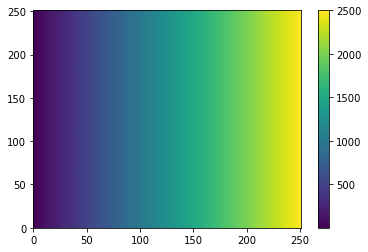

In [3]:
plt.pcolormesh(environment)
plt.colorbar();

# Initial parameters for speciation models

In [4]:
pop_size = 100
num_gen = 100
plot_at = np.linspace(0,num_gen-1,10).astype(int)
dt = 1e0

## Speciation model without trait-mediated competition

In [5]:
def mode1_run():
    env_fileds = np.stack([environment, environment])
    env_fileds_min = []
    env_fileds_max = []
    for i in range(env_fileds.shape[0]):
        env_fileds_min.append(env_fileds[i,:,:].min().round())
        env_fileds_max.append(env_fileds[i,:,:].max().round())
    
    model1 = IR12SpeciationModel(X, Y, pop_size, nb_radius=50, car_cap=25,
                                 slope_trait_env = [0.95, -0.95],
                                 sigma_env_trait=0.2, sigma_mov=5, sigma_mut=0.05,
                                 mut_prob=0.05, random_seed=1234, 
                                 always_direct_parent=True)
    print(model1)
    model1.initialize([[0.5, 0.5], [0.5, 0.5]])
    dfs1 = []
    for step in range(num_gen):
        model1.evaluate_fitness(env_fileds, env_fileds_min, env_fileds_max, dt)
        dfs1.append(model1.to_dataframe())
        model1.update_individuals(dt)
    return pd.concat(dfs1)

In [6]:
%time df1 = mode1_run()
df1

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    slope_trait_env: [0.95, -0.95]
    lifespan: None
    random_seed: 1234
    always_direct_parent: True
    distance_method: ward
    distance_value: 0.5
    nb_radius: 50
    car_cap: 25
    sigma_env_trait: 0.2
    sigma_mov: 5
    sigma_mut: 0.05
    mut_prob: 0.05
    on_extinction: warn

taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id

step  time   dt     id           x           y  taxon_id  ancestor_id  \
0       0   0.0  0.0      0  186.818327  143.103259         1            0   
1       0   0.0  0.0      1    0.517769  122.754664         1            0   
2       0   0.0  0.0      2  202.339080  179.922215         1            0   
3       0   0.0  0.0      3  201.702223  115.946603         1            0   
4       0   0.0  0.0      4   13.633167  212.778365         1            0   
..    ...   ...  ...    ...         ...         ...       ...          ...   
143    99  99.0  0.0  11994  125.677224  191.002469       647          639   
144    99  99.0  0.0  11995  112.001942  166.052857       655          643   
145    99  99.0  0.0  11996   80.693025  222.763987       647          639   
146    99  99.0  0.0  11997   87.682949  214.077518       647          639   
147    99  99.0  0.0  11998  152.747425   93.129685       655          643   

     n_offspring   fitness   trait_0   trait_1  
0              1  0.250409  0.500000  0.500000  
1              0  0.003888  0.500000  0.500000  
2              0  0.117857  0.500000  0.500000  
3              0  0.117776  0.500000  0.500000  
4              0  0.011735  0.500000  0.500000  
..           ...       ...       ...       ...  
143            1  0.710059  0.360196  0.414042  
144            1  0.847935  0.433857  0.435860  
145            1  0.711098  0.370582  0.506178  
146            1  0.883088  0.415814  0.558067  
147            1  0.600927  0.410646  0.442672  

[11999 rows x 12 columns]

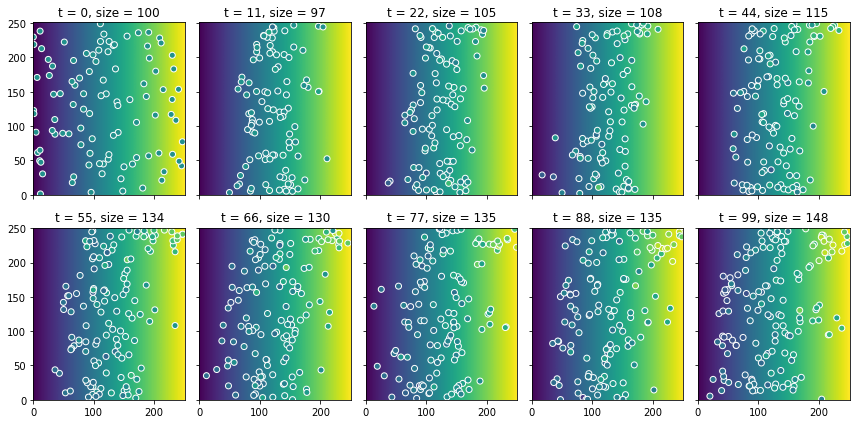

In [7]:
fig1, axes1 = plt.subplots(nrows=2, ncols=5, sharex='col', sharey='row',figsize=(12, 6))
for ax, print_step in zip(axes1.ravel(), plot_at):
    pop = df1.groupby('step').get_group(print_step)
    ax.pcolormesh(environment)
    ax.scatter(pop.x, pop.y, c=pop.trait_0, edgecolor='w',vmin=0, vmax=1)
    ax.set_title(f't = {print_step}, size = {len(pop)}')
fig1.tight_layout()

Text(0.5, 0, 'Time (generations)')

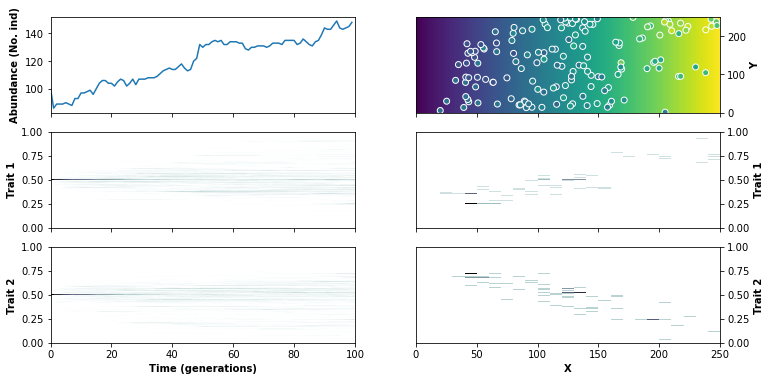

In [8]:
fig2, axs2 = plt.subplots(3, 2, sharex="col", figsize=(12, 6))
axs2[0,0].plot(df1.groupby('step').size())

axs2[0, 1].pcolormesh(environment)
axs2[0, 1].scatter(df1['x'].loc[df1['step']==max(df1['step'])], 
                   df1['y'].loc[df1['step']==max(df1['step'])], 
                   c=df1['trait_0'].loc[df1['step']==max(df1['step'])],
                   edgecolor='w',vmin=0, vmax=1)
h,xedge,yedge,_=axs2[1,1].hist2d(x=df1['x'].loc[df1['step']==max(df1['step'])], 
                                 y=df1['trait_0'].loc[df1['step']==max(df1['step'])], 
                                 range=((0, X.max()), (0, 1)),
                                 bins=(25, 250), cmap='bone_r')
h,xedge,yedge,_=axs2[1,0].hist2d(x=df1['step'], y=df1['trait_0'], 
                                 range=((0, num_gen), (0, 1)), 
                                 bins=(num_gen, 100), cmap='bone_r')
h,xedge,yedge,_=axs2[2,1].hist2d(x=df1['x'].loc[df1['step']==max(df1['step'])], 
                                 y=df1['trait_1'].loc[df1['step']==max(df1['step'])], 
                                 range=((0, X.max()), (0, 1)),
                                 bins=(25, 250), cmap='bone_r')
h,xedge,yedge,_=axs2[2,0].hist2d(x=df1['step'], y=df1['trait_1'], 
                                 range=((0, num_gen), (0, 1)), 
                                 bins=(num_gen, 100), cmap='bone_r')
axs2[0, 1].yaxis.set_label_position("right")
axs2[0, 1].yaxis.tick_right()
axs2[1, 1].yaxis.set_label_position("right")
axs2[1, 1].yaxis.tick_right()
axs2[2, 1].yaxis.set_label_position("right")
axs2[2, 1].yaxis.tick_right()
axs2[0, 1].set_ylabel('Y', weight='bold')
axs2[0, 0].set_ylabel('Abundance (No. ind)', weight='bold')
axs2[1, 1].set_ylabel('Trait 1', weight='bold')
axs2[1, 0].set_ylabel('Trait 1', weight='bold')
axs2[2, 1].set_ylabel('Trait 2', weight='bold')
axs2[2, 0].set_ylabel('Trait 2', weight='bold')
axs2[2, 1].set_xlabel('X', weight='bold')
axs2[2, 0].set_xlabel('Time (generations)', weight='bold')

In [9]:
taxon_lineage1 = txl.dtf_taxon(df1.rename(columns={'out':'time'}))
taxon_lineage1

time   id parent   trait_0   trait_1  abundance node_type  branch_length
0     0.0    1      0  0.500000  0.500000        100      root          0.001
1     1.0    2      1  0.498784  0.496415         86      node          1.001
2     2.0    3      2  0.498492  0.496850         89      node          1.001
3     3.0    4      3  0.497703  0.498127         89      node          1.001
4     4.0    5      4  0.495311  0.501072         89      node          1.001
..    ...  ...    ...       ...       ...        ...       ...            ...
655  99.0  656    641  0.412655  0.537792          7      leaf          0.001
656  99.0  657    642  0.597515  0.520064          3      leaf          0.001
657  99.0  658    646  0.831661  0.170039         13      leaf          0.001
658  99.0  659    644  0.617407  0.283898         14      leaf          0.001
659  99.0  660    645  0.507375  0.530630          9      leaf          0.001

[660 rows x 8 columns]

In [10]:
tree1 = txl.pandas_dtf_to_dendropy_tree(taxon_lineage1)

In [11]:
tree1.print_plot()

                                                        /++++++++++++++++++ 656
       /+++++++++++++++++++++++++++++++++++++++++++++++++                      
       |                                                |            /+++++ 653
       |                                                \+++++++++++++         
       |                                                             \+++++ 654
       |                                                                       
       |                             ++++++++++++++++++++++++++++++++++++++ 658
++++++++   /++++++++++++++++++++++++++                                         
       |   |                         |                               /+++++ 649
       |   |                         +++++++++++++++++++++++++++++++++         
       |   |                                                         \+++++ 650
       |   |                                                                   
       |   |                  /+++++++++

## Speciation model with trait-mediated competition

In [12]:
from paraspec.base import DD03SpeciationModel

In [13]:
def model2_run():
    env_fileds = np.stack([environment, environment, environment])
    env_fileds_min = []
    env_fileds_max = []
    for i in range(env_fileds.shape[0]):
        env_fileds_min.append(env_fileds[i,:,:].min().round())
        env_fileds_max.append(env_fileds[i,:,:].max().round())

    model2 = DD03SpeciationModel(X, Y, pop_size, birth_rate=1, movement_rate=5, 
                                 slope_trait_env= [0.95, -0.95, 0.95],
                                 car_cap_max=250, sigma_env_trait=0.2, 
                                 mut_prob=0.05, sigma_mut=0.05, sigma_mov=5, sigma_comp_trait=0.9, 
                                 sigma_comp_dist=0.1, random_seed=1234,
                                always_direct_parent=True)
    print(model2)
    model2.initialize([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]])
    dfs2 = []
    for step in range(num_gen):
        model2.evaluate_fitness(env_fileds, env_fileds_min, env_fileds_max, dt)
        dfs2.append(model2.to_dataframe())
        model2.update_individuals(dt)
    return pd.concat(dfs2)

In [14]:
%time df2 = model2_run()
df2

<DD03SpeciationModel (individuals: not initialized)>
Parameters:
    slope_trait_env: [0.95, -0.95, 0.95]
    lifespan: None
    random_seed: 1234
    always_direct_parent: True
    distance_method: ward
    distance_value: 0.5
    birth_rate: 1
    movement_rate: 5
    car_cap_max: 250
    sigma_env_trait: 0.2
    mut_prob: 0.05
    sigma_mut: 0.05
    sigma_mov: 5
    sigma_comp_trait: 0.9
    sigma_comp_dist: 0.1

taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
taxon_id
tax

step  time   dt    id           x           y  taxon_id  ancestor_id  \
0       0   0.0  0.0     0  143.103259   31.638652         1            0   
1       0   0.0  0.0     1  122.754664   98.739350         1            0   
2       0   0.0  0.0     2  179.922215  228.904635         1            0   
3       0   0.0  0.0     3  115.946603  188.807148         1            0   
4       0   0.0  0.0     4  212.778365   15.738801         1            0   
..    ...   ...  ...   ...         ...         ...       ...          ...   
150    99  99.0  1.0  1691  137.765484  205.054346       418          406   
151    99  99.0  1.0  1692  127.056498  200.958194       418          406   
152    99  99.0  1.0  1693  129.854971  231.333327       418          406   
153    99  99.0  1.0  1694  107.260573   82.144309       418          406   
154    99  99.0  1.0  1695  172.699732   62.475891       418          406   

     n_offspring events_i    death_i   trait_0   trait_1   trait_2  
0              0        D   0.852956  0.500000  0.500000  0.500000  
1              0        D   0.644546  0.500000  0.500000  0.500000  
2              0        D   2.887159  0.500000  0.500000  0.500000  
3              0        D   0.690141  0.500000  0.500000  0.500000  
4              0        D  37.460354  0.500000  0.500000  0.500000  
..           ...      ...        ...       ...       ...       ...  
150            1        M   2.458488  0.500000  0.500000  0.500000  
151            1        M   2.599574  0.500000  0.500000  0.500000  
152            1        M   2.678932  0.520383  0.553258  0.532147  
153            1        M   3.874427  0.500000  0.500000  0.500000  
154            1        M   4.655332  0.500000  0.500000  0.500000  

[11441 rows x 14 columns]

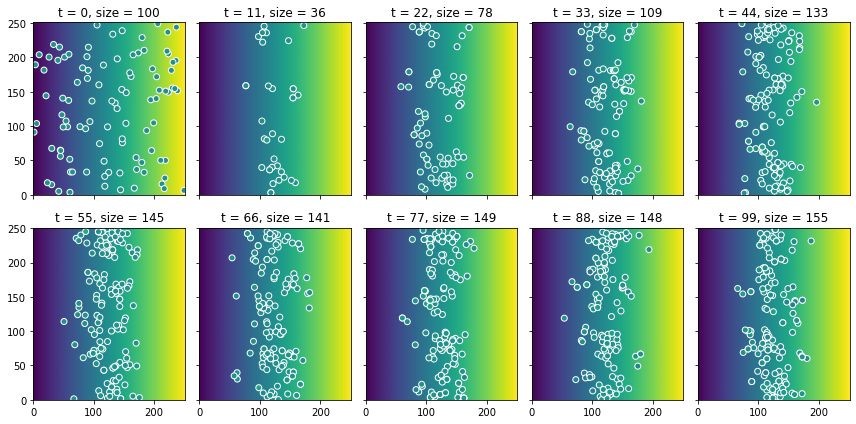

In [15]:
fig3, axes3 = plt.subplots(nrows=2, ncols=5, sharex='col', sharey='row',figsize=(12, 6))
for ax, print_step in zip(axes3.ravel(), plot_at):
    pop = df2.groupby('step').get_group(print_step)
    ax.pcolormesh(environment)
    ax.scatter(pop.x, pop.y, c=pop.trait_0, edgecolor='w',vmin=0, vmax=1)
    ax.set_title(f't = {print_step}, size = {len(pop)}')
fig3.tight_layout()

Text(0.5, 0, 'Time (generations)')

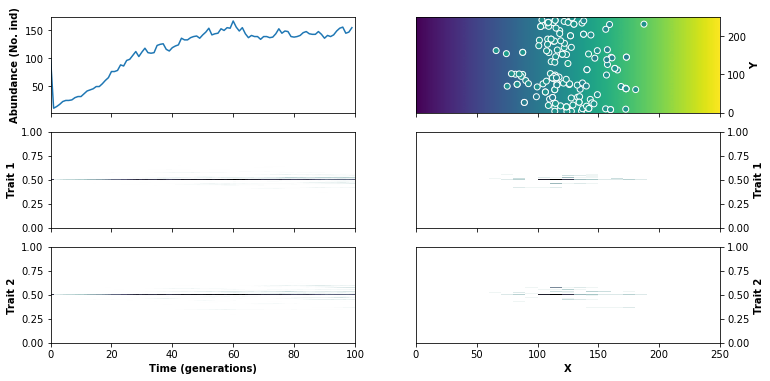

In [16]:
fig4, axs4 = plt.subplots(3, 2, sharex="col", figsize=(12, 6))
axs4[0,0].plot(df2.groupby('step').size())
axs4[0, 1].pcolormesh(environment)
axs4[0, 1].scatter(df2['x'].loc[df2['step']==max(df2['step'])], 
                      df2['y'].loc[df2['step']==max(df2['step'])], 
                      c=df2['trait_0'].loc[df2['step']==max(df2['step'])], 
                      edgecolor='w',vmin=0, vmax=1)
h,xedge,yedge,_=axs4[1,1].hist2d(x=df2['x'].loc[df2['step']==max(df2['step'])], 
                                 y=df2['trait_0'].loc[df2['step']==max(df2['step'])], 
                                 range=((0, X.max()), (0, 1)),
                                 bins=(25, 250), cmap='bone_r')
h,xedge,yedge,_=axs4[1,0].hist2d(x=df2['step'], y=df2['trait_0'], 
                                 range=((0, num_gen), (0, 1)), 
                                 bins=(num_gen, 100), cmap='bone_r')
h,xedge,yedge,_=axs4[2,1].hist2d(x=df2['x'].loc[df2['step']==max(df2['step'])], 
                                 y=df2['trait_1'].loc[df2['step']==max(df2['step'])], 
                                 range=((0, X.max()), (0, 1)),
                                 bins=(25, 250), cmap='bone_r')
h,xedge,yedge,_=axs4[2,0].hist2d(x=df2['step'], y=df2['trait_1'], 
                                 range=((0, num_gen), (0, 1)), 
                                 bins=(num_gen, 100), cmap='bone_r')
axs4[0, 1].yaxis.set_label_position("right")
axs4[0, 1].yaxis.tick_right()
axs4[1, 1].yaxis.set_label_position("right")
axs4[1, 1].yaxis.tick_right()
axs4[2, 1].yaxis.set_label_position("right")
axs4[2, 1].yaxis.tick_right()
axs4[0, 1].set_ylabel('Y', weight='bold')
axs4[0, 0].set_ylabel('Abundance (No. ind)', weight='bold')
axs4[1, 1].set_ylabel('Trait 1', weight='bold')
axs4[1, 0].set_ylabel('Trait 1', weight='bold')
axs4[2, 1].set_ylabel('Trait 2', weight='bold')
axs4[2, 0].set_ylabel('Trait 2', weight='bold')
axs4[2, 1].set_xlabel('X', weight='bold')
axs4[2, 0].set_xlabel('Time (generations)', weight='bold')

In [17]:
taxon_lineage2 = txl.dtf_taxon(df2.rename(columns={'out':'time'}))
taxon_lineage2

time   id parent   trait_0   trait_1   trait_2  abundance node_type  \
0     0.0    1      0  0.500000  0.500000  0.500000        100      root   
1     1.0    2      1  0.500000  0.500000  0.500000         10      node   
2     2.0    3      2  0.500000  0.500000  0.500000         13      node   
3     3.0    4      3  0.500000  0.500000  0.500000         17      node   
4     4.0    5      4  0.500000  0.500000  0.500000         22      node   
..    ...  ...    ...       ...       ...       ...        ...       ...   
420  99.0  421    409  0.494227  0.501338  0.495360         14      leaf   
421  99.0  422    413  0.505344  0.520488  0.498061         21      leaf   
422  99.0  423    412  0.505979  0.503848  0.509222         15      leaf   
423  99.0  424    411  0.496973  0.520325  0.481728          6      leaf   
424  99.0  425    410  0.479826  0.522408  0.513013          2      leaf   

     branch_length  
0            0.001  
1            1.001  
2            1.001  
3            1.001  
4            1.001  
..             ...  
420          0.001  
421          0.001  
422          0.001  
423          0.001  
424          0.001  

[425 rows x 9 columns]

In [18]:
tree2 = txl.pandas_dtf_to_dendropy_tree(taxon_lineage2)

In [19]:
tree2.print_plot()

                                      /---------------------------+++++++++ 105
+++++++++++++++++++++++++++++++++++++++                                        
                                      | +++++++++++++++++++++++++++++++++++ 418
                                      \++                                      
                                        |/+++++++++++++++++++++++++++++++++ 415
                                        ++                                     
                                         |/++++++++++++++++++++++++++++++++ 424
                                         \+                                    
                                          |/------------------+++++++++++++ 180
                                          \+                                   
                                           |/++++++++++++++++++++++++++++++ 422
                                           \+                                  
                                        

In [20]:
#%timeit mode1_run()

In [21]:
#%timeit model2_run()